# Distributions

In [33]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [34]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

## Histograms

One of the best ways to describe a variable is to report the values that
appear in the dataset and how many times each value appears. This
description is called the **distribution** of the variable.

The most common representation of a distribution is a **histogram**,
which is a graph that shows the **frequency** of each value. In this
context, "frequency" means the number of times the value appears.

In Python, an efficient way to compute frequencies is with a dictionary.
Given a sequence of values, `t`:

In [1]:
t = [1, 2, 2, 3, 5]

In [2]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1

The result is a dictionary that maps from values to frequencies.
Alternatively, you could use the `Counter` class defined in the
`collections` module:

In [4]:
from collections import Counter

counter = Counter(t)

The result is a `Counter` object, which is a subclass of dictionary.

Another option is to use the pandas method `value_counts`, which we saw
in the previous chapter. But for this book I created a class, Hist, that
represents histograms and provides the methods that operate on them.

## Representing histograms

The Hist constructor can take a sequence, dictionary, pandas Series, or
another Hist. You can instantiate a Hist object like this:

In [6]:
from thinkstats2 import Hist

hist = Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

Hist objects provide `Freq`, which takes a value and returns its
frequency:

In [7]:
hist.Freq(2)

2

The bracket operator does the same thing:

In [8]:
hist[2]

2

If you look up a value that has never appeared, the frequency is 0.

In [9]:
hist.Freq(4)

0

`Values` returns an unsorted list of the values in the Hist:

In [10]:
hist.Values()

dict_keys([1, 2, 3, 5])

To loop through the values in order, you can use the built-in function
`sorted`:

In [11]:
for val in sorted(hist.Values()):
    print(val, hist.Freq(val))

1 1
2 2
3 1
5 1


Or you can use `Items` to iterate through value-frequency pairs:

In [12]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


## Plotting histograms

![Histogram of the pound part of birth
weight.](figs/first_wgt_lb_hist.pdf){height="2.5in"}

For this book I wrote a module called `thinkplot.py` that provides
functions for plotting Hists and other objects defined in
`thinkstats2.py`. It is based on `pyplot`, which is part of the
`matplotlib` package. See Section [\[code\]](#code){reference-type="ref"
reference="code"} for information about installing `matplotlib`.

To plot `hist` with `thinkplot`, try this:

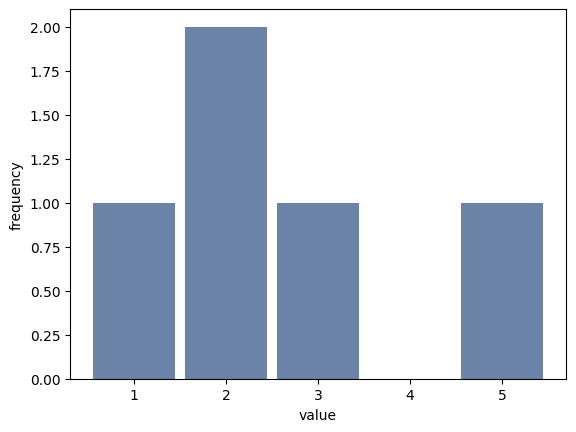

<Figure size 800x600 with 0 Axes>

In [13]:
import thinkplot

thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

You can read the documentation for `thinkplot` at
<http://greenteapress.com/thinkstats2/thinkplot.html>.

## NSFG variables

Now let's get back to the data from the NSFG. 
When you start working with a new dataset, I suggest you explore the
variables you are planning to use one at a time, and a good way to start
is by looking at histograms.

In Section [\[cleaning\]](#cleaning){reference-type="ref"
reference="cleaning"} we transformed `agepreg` from centiyears to years,
and combined `birthwgt_lb` and `birthwgt_oz` into a single quantity,
`totalwgt_lb`. In this section I use these variables to demonstrate some
features of histograms.

I'll start by reading the data and selecting records for live births:

In [15]:
from nsfg import ReadFemPreg

preg = ReadFemPreg()
live = preg[preg.outcome == 1]

The expression in brackets is a boolean Series that selects rows from
the DataFrame and returns a new DataFrame. Next I generate and plot the
histogram of `birthwgt_lb` for live births.

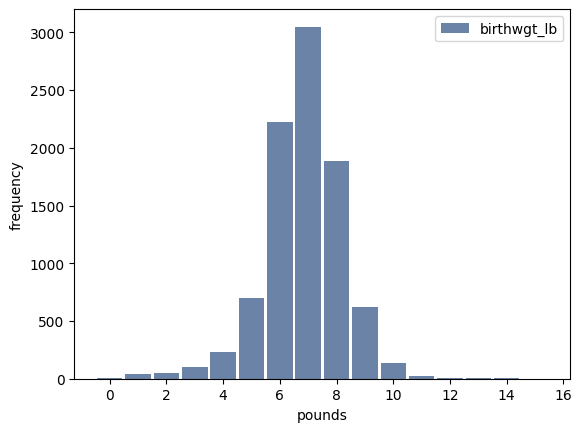

<Figure size 800x600 with 0 Axes>

In [17]:
hist = Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

When the argument passed to Hist is a pandas Series, any `nan` values
are dropped. `label` is a string that appears in the legend when the
Hist is plotted.

![Histogram of pregnancy length in
weeks.](figs/first_prglngth_hist.pdf){height="2.5in"}

Figure [\[first_wgt_lb_hist\]](#first_wgt_lb_hist){reference-type="ref"
reference="first_wgt_lb_hist"} shows the result. The most common value,
called the **mode**, is 7 pounds. The distribution is approximately
bell-shaped, which is the shape of the **normal** distribution, also
called a **Gaussian** distribution. But unlike a true normal
distribution, this distribution is asymmetric; it has a **tail** that
extends farther to the left than to the right.

Figure [\[first_wgt_oz_hist\]](#first_wgt_oz_hist){reference-type="ref"
reference="first_wgt_oz_hist"} shows the histogram of `birthwgt_oz`,
which is the ounces part of birth weight. In theory we expect this
distribution to be **uniform**; that is, all values should have the same
frequency. In fact, 0 is more common than the other values, and 1 and 15
are less common, probably because respondents round off birth weights
that are close to an integer value.

Figure [\[first_agepreg_hist\]](#first_agepreg_hist){reference-type="ref"
reference="first_agepreg_hist"} shows the histogram of `agepreg`, the
mother's age at the end of pregnancy. The mode is 21 years. The
distribution is very roughly bell-shaped, but in this case the tail
extends farther to the right than left; most mothers are in their 20s,
fewer in their 30s.

Figure [\[first_prglngth_hist\]](#first_prglngth_hist){reference-type="ref"
reference="first_prglngth_hist"} shows the histogram of `prglngth`, the
length of the pregnancy in weeks. By far the most common value is 39
weeks. The left tail is longer than the right; early babies are common,
but pregnancies seldom go past 43 weeks, and doctors often intervene if
they do.

## Outliers

Looking at histograms, it is easy to identify the most common values and
the shape of the distribution, but rare values are not always visible.

Before going on, it is a good idea to check for **outliers**, which are
extreme values that might be errors in measurement and recording, or
might be accurate reports of rare events.

Hist provides methods `Largest` and `Smallest`, which take an integer
`n` and return the `n` largest or smallest values from the histogram:

In [18]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0.0 8
1.0 40
2.0 53
3.0 98
4.0 229
5.0 697
6.0 2223
7.0 3049
8.0 1889
9.0 623


In the list of pregnancy lengths for live births, the 10 lowest values
are `[0, 4, 9, 13, 17, 18, 19, 20, 21, 22]`. Values below 10 weeks are
certainly errors; the most likely explanation is that the outcome was
not coded correctly. Values higher than 30 weeks are probably
legitimate. Between 10 and 30 weeks, it is hard to be sure; some values
are probably errors, but some represent premature babies.

On the other end of the range, the highest values are:

Most doctors recommend induced labor if a pregnancy exceeds 42 weeks, so
some of the longer values are surprising. In particular, 50 weeks seems
medically unlikely.

The best way to handle outliers depends on "domain knowledge"; that is,
information about where the data come from and what they mean. And it
depends on what analysis you are planning to perform.

In this example, the motivating question is whether first babies tend to
be early (or late). When people ask this question, they are usually
interested in full-term pregnancies, so for this analysis I will focus
on pregnancies longer than 27 weeks.

## First babies

Now we can compare the distribution of pregnancy lengths for first
babies and others. I divided the DataFrame of live births using
`birthord`, and computed their histograms:

In [19]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = Hist(firsts.prglngth, label='first')
other_hist = Hist(others.prglngth, label='other')

Then I plotted their histograms on the same axis:

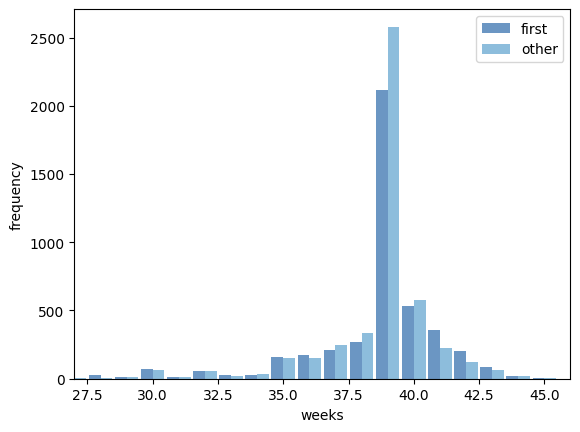

<Figure size 800x600 with 0 Axes>

In [20]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency',
               xlim=[27, 46])

`thinkplot.PrePlot` takes the number of histograms we are planning to
plot; it uses this information to choose an appropriate collection of
colors.

![Histogram of pregnancy
lengths.](figs/first_nsfg_hist.pdf){height="2.5in"}

`thinkplot.Hist` normally uses `align='center'` so that each bar is
centered over its value. For this figure, I use `align='right'` and
`align='left'` to place corresponding bars on either side of the value.

With `width=0.45`, the total width of the two bars is 0.9, leaving some
space between each pair.

Finally, I adjust the axis to show only data between 27 and 46 weeks.
Figure [\[first_nsfg_hist\]](#first_nsfg_hist){reference-type="ref"
reference="first_nsfg_hist"} shows the result.

Histograms are useful because they make the most frequent values
immediately apparent. But they are not the best choice for comparing two
distributions. In this example, there are fewer "first babies" than
"others," so some of the apparent differences in the histograms are due
to sample sizes. In the next chapter we address this problem using
probability mass functions.

## Summarizing distributions

A histogram is a complete description of the distribution of a sample;
that is, given a histogram, we could reconstruct the values in the
sample (although not their order).

If the details of the distribution are important, it might be necessary
to present a histogram. But often we want to summarize the distribution
with a few descriptive statistics.

Some of the characteristics we might want to report are:

-   central tendency: Do the values tend to cluster around a particular
    point?

-   modes: Is there more than one cluster?

-   spread: How much variability is there in the values?

-   tails: How quickly do the probabilities drop off as we move away
    from the modes?

-   outliers: Are there extreme values far from the modes?

Statistics designed to answer these questions are called **summary
statistics**. By far the most common summary statistic is the **mean**,
which is meant to describe the central tendency of the distribution.

If you have a sample of `n` values, $x_i$, the mean, $\xbar$, is the sum
of the values divided by the number of values; in other words
$$\xbar = \frac{1}{n} \sum_i x_i$$ The words "mean" and "average" are
sometimes used interchangeably, but I make this distinction:

-   The "mean" of a sample is the summary statistic computed with the
    previous formula.

-   An "average" is one of several summary statistics you might choose
    to describe a central tendency.

Sometimes the mean is a good description of a set of values. For
example, apples are all pretty much the same size (at least the ones
sold in supermarkets). So if I buy 6 apples and the total weight is 3
pounds, it would be a reasonable summary to say they are about a half
pound each.

But pumpkins are more diverse. Suppose I grow several varieties in my
garden, and one day I harvest three decorative pumpkins that are 1 pound
each, two pie pumpkins that are 3 pounds each, and one Atlantic
Giant pumpkin that weighs 591 pounds. The mean of this sample is 100
pounds, but if I told you "The average pumpkin in my garden is 100
pounds," that would be misleading. In this example, there is no
meaningful average because there is no typical pumpkin.

## Variance

If there is no single number that summarizes pumpkin weights, we can do
a little better with two numbers: mean and **variance**.

Variance is a summary statistic intended to describe the variability or
spread of a distribution. The variance of a set of values is
$$S^2 = \frac{1}{n} \sum_i (x_i - \xbar)^2$$ The term $x_i - \xbar$ is
called the "deviation from the mean," so variance is the mean squared
deviation. The square root of variance, $S$, is the **standard
deviation**.

If you have prior experience, you might have seen a formula for variance
with $n-1$ in the denominator, rather than `n`. This statistic is used
to estimate the variance in a population using a sample. We will come
back to this in
Chapter [\[estimation\]](#estimation){reference-type="ref"
reference="estimation"}.

Pandas data structures provides methods to compute mean, variance and
standard deviation:

In [23]:
mean = live.prglngth.mean()
mean

38.56055968517709

In [24]:
var = live.prglngth.var()
var

7.302662067826817

In [25]:
std = live.prglngth.std()
std

2.702343810070587

For all live births, the mean pregnancy length is 38.6 weeks, the
standard deviation is 2.7 weeks, which means we should expect deviations
of 2-3 weeks to be common.

Variance of pregnancy length is 7.3, which is hard to interpret,
especially since the units are weeks$^2$, or "square weeks." Variance is
useful in some calculations, but it is not a good summary statistic.

## Effect size

An **effect size** is a summary statistic intended to describe (wait for
it) the size of an effect. For example, to describe the difference
between two groups, one obvious choice is the difference in the means.

Mean pregnancy length for first babies is 38.601; for other babies it is
38.523. The difference is 0.078 weeks, which works out to 13 hours. As a
fraction of the typical pregnancy length, this difference is about 0.2%.

If we assume this estimate is accurate, such a difference would have no
practical consequences. In fact, without observing a large number of
pregnancies, it is unlikely that anyone would notice this difference at
all.

Another way to convey the size of the effect is to compare the
difference between groups to the variability within groups. Cohen's $d$
is a statistic intended to do that; it is defined
$$d = \frac{\bar{x_1} - \bar{x_2}}{s}$$ where $\bar{x_1}$ and
$\bar{x_2}$ are the means of the groups and $s$ is the "pooled standard
deviation". Here's the Python code that computes Cohen's $d$:

In [29]:
import numpy as np

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In this example, the difference in means is 0.029 standard deviations,
which is small. To put that in perspective, the difference in height
between men and women is about 1.7 standard deviations (see
<https://en.wikipedia.org/wiki/Effect_size>).

## Reporting results

We have seen several ways to describe the difference in pregnancy length
(if there is one) between first babies and others. How should we report
these results?

The answer depends on who is asking the question. A scientist might be
interested in any (real) effect, no matter how small. A doctor might
only care about effects that are **clinically significant**; that is,
differences that affect treatment decisions. A pregnant woman might be
interested in results that are relevant to her, like the probability of
delivering early or late.

How you report results also depends on your goals. If you are trying to
demonstrate the importance of an effect, you might choose summary
statistics that emphasize differences. If you are trying to reassure a
patient, you might choose statistics that put the differences in
context.

Of course your decisions should also be guided by professional ethics.
It's ok to be persuasive; you *should* design statistical reports and
visualizations that tell a story clearly. But you should also do your
best to make your reports honest, and to acknowledge uncertainty and
limitations.

## Exercises

### Exercise
Based on the results in this chapter, suppose you were asked to
summarize what you learned about whether first babies arrive late.

Which summary statistics would you use if you wanted to get a story on
the evening news? Which ones would you use if you wanted to reassure an
anxious patient?

Finally, imagine that you are Cecil Adams, author of *The Straight Dope*
(<http://straightdope.com>), and your job is to answer the question, "Do
first babies arrive late?" Write a paragraph that uses the results in
this chapter to answer the question clearly, precisely, and honestly.


### Exercise
In the repository you downloaded, you should find a file named
`chap02ex.ipynb`; open it. Some cells are already filled in, and you
should execute them. Other cells give you instructions for exercises.
Follow the instructions and fill in the answers.

A solution to this exercise is in `chap02soln.ipynb`


In the repository you downloaded, you should find a file named
`chap02ex.py`; you can use this file as a starting place for the
following exercises. My solution is in `chap02soln.py`.

### Exercise
The mode of a distribution is the most frequent value; see
<http://wikipedia.org/wiki/Mode_(statistics)>. Write a function called
`Mode` that takes a Hist and returns the most frequent value.

As a more challenging exercise, write a function called `AllModes` that
returns a list of value-frequency pairs in descending order of
frequency.


### Exercise
Using the variable `totalwgt_lb`, investigate whether first babies are
lighter or heavier than others. Compute Cohen's $d$ to quantify the
difference between the groups. How does it compare to the difference in
pregnancy length?


## Glossary

-   **distribution**: The values that appear in a sample and the
    frequency of each.

-   **histogram**: A mapping from values to frequencies, or a graph that
    shows this mapping.

-   **frequency**: The number of times a value appears in a sample.

-   **mode**: The most frequent value in a sample, or one of the most
    frequent values.

-   **normal distribution**: An idealization of a bell-shaped
    distribution; also known as a Gaussian distribution.

-   **uniform distribution**: A distribution in which all values have
    the same frequency.

-   **tail**: The part of a distribution at the high and low extremes.

-   **central tendency**: A characteristic of a sample or population;
    intuitively, it is an average or typical value.

-   **outlier**: A value far from the central tendency.

-   **spread**: A measure of how spread out the values in a distribution
    are.

-   **summary statistic**: A statistic that quantifies some aspect of a
    distribution, like central tendency or spread.

-   **variance**: A summary statistic often used to quantify spread.

-   **standard deviation**: The square root of variance, also used as a
    measure of spread.

-   **effect size**: A summary statistic intended to quantify the size
    of an effect like a difference between groups.

-   **clinically significant**: A result, like a difference between
    groups, that is relevant in practice.

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [30]:
# Solution

firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [31]:
# Solution

CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.08867292707260174

For the next few exercises, we'll load the respondent file:

In [35]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [38]:
from nsfg import ReadFemResp

resp = ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf).

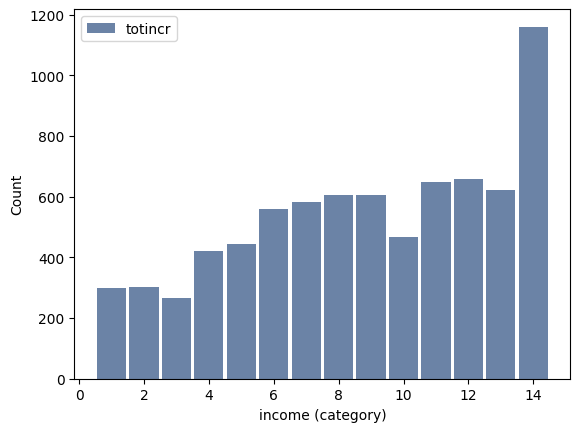

In [39]:
# Solution

hist = Hist(resp.totincr)
thinkplot.Hist(hist, label='totincr')
thinkplot.Config(xlabel='income (category)', ylabel='Count')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

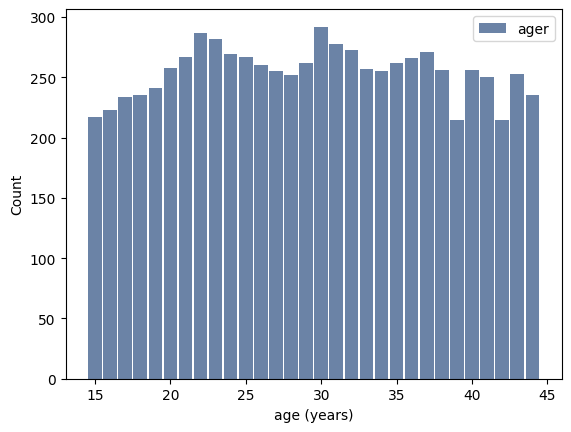

In [40]:
# Solution

hist = Hist(resp.ager)
thinkplot.Hist(hist, label='ager')
thinkplot.Config(xlabel='age (years)', ylabel='Count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

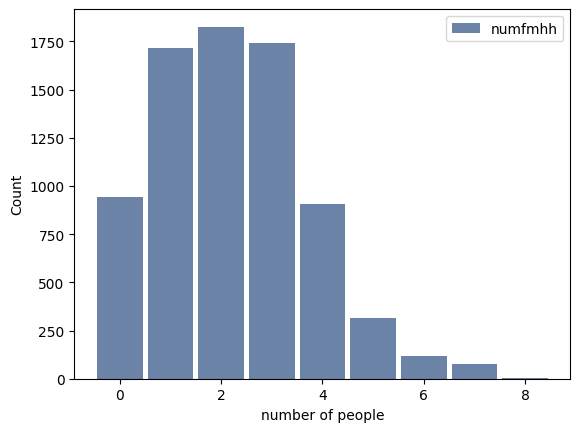

In [41]:
# Solution

hist = Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Config(xlabel='number of people', ylabel='Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

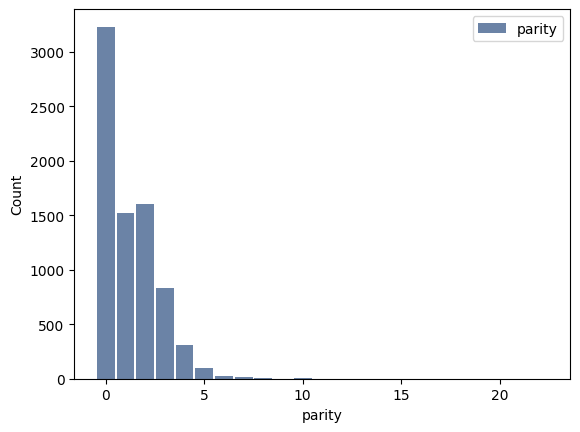

In [42]:
# Solution

# This distribution is positive-valued and skewed to the right.

hist = Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Config(xlabel='parity', ylabel='Count')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [43]:
# Solution

hist.Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

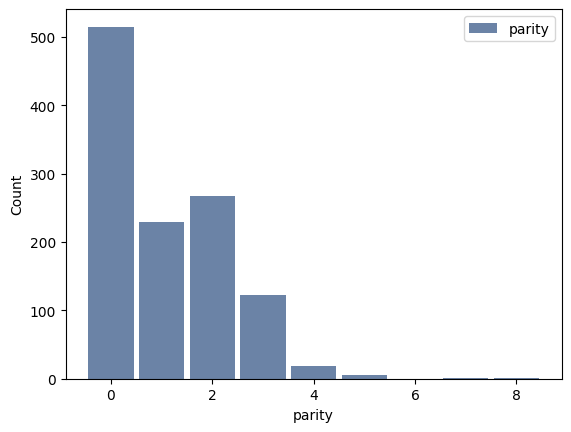

In [44]:
# Solution

rich = resp[resp.totincr == 14]
hist = Hist(rich.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Config(xlabel='parity', ylabel='Count')

Find the largest parities for high income respondents.

In [45]:
# Solution

hist.Largest(10)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [46]:
# Solution

not_rich = resp[resp.totincr < 14]
rich.parity.mean(), not_rich.parity.mean()

(1.0758620689655172, 1.2495758136665125)

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [47]:
# Solution

# This effect is about 10 times stronger than the difference in pregnancy length.
# But remembering the design of the study, we should not make too much of this
# apparent effect.

CohenEffectSize(rich.parity, not_rich.parity)

-0.12511855314660367